# Access CRDB through REST interface

A [REST](https://en.wikipedia.org/wiki/Representational_state_transfer) interface is available at the following URL: http://lpsc.in2p3.fr/crdb/rest.php to query the database.

Click on the tab "REST interface" to see the list of parameters. Minimal required are the parameters `num` and `energy_type`. There are several optional parameters, see the website for details.

A REST query to the database is asking for data. The parameters specify what data to pull and in which format. The query URL has this format:

`url?par1=value1&par2=value2&...&parN=valueN`

where `url` is `http://lpsc.in2p3.fr/crdb/rest.php`, `par1` to `parN` are parameter names and `value1` to `valueN` are parameter values. Name and value pairs are connected by `=`, and individual pairs are linked by `&`.

The `num` parameter is the element, isotope, or particle, whose flux is requested. Valid values are `H`, `He`, `e+` written as `e%2B`, `3H`, and so on. A flux ratio can be requested by also providing the optional `den` parameter, then `num` stands for numerator and `den` for denominator. The other required parameter is `energy_type`. It is used to request the energy unit. Valid values are `EKN`, `EK`, `R`, `ETOT`. See the website for details.

## Using curl

To start queries from a terminal we recommend the program `curl`, which is available for Linux and MacOSX (e.g. via homebrew).

The following command downloads all available boron-to-carbon flux ratios as a function of kinetic energy per nucleon, and save the output in a file called `db.txt`.

In [1]:
!curl -L 'http://lpsc.in2p3.fr/crdb/rest.php?num=B&den=C&energy_type=EKN' > db.txt

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 70240    0 70240    0     0   172k      0 --:--:-- --:--:-- --:--:--  172k


In [2]:
# first 25 lines of what we downloaded
!head -25 db.txt

# Data export from the Cosmic-Ray database (http://lpsc.in2p3.fr/crdb)
# Please cite Maurin, Melot, Taillet, A&A 569, A32 (2014) [arXiv:1302.5525]
# Date: 2020/04/29
# Format: USINE code
#   Col.1  -  QUANTITY NAME (case insensitive)
#   Col.2  -  SUB-EXP NAME (case insensitive, no space)
#   Col.3  -  EAXIS TYPE: EKN, EK, R, or ETOT
#   Col.4  -  <E>: mean value bin [GeV/n, GeV, GV, or GeV]
#   Col.5  -  EBIN_LOW
#   Col.6  -  EBIN_HIGH
#   Col.7  -  QUANTITY VALUE: [#/sr/s/m2/EAxis] if flux , no unit if ratio
#   Col.8  -  ERR_STAT-
#   Col.9  -  ERR_STAT+
#   Col.10 -  ERR_SYST-
#   Col.11 -  ERR_SYST+
#   Col.12 -  ADS URL FOR PAPER REF (no space)
#   Col.13 -  phi [MV]
#   Col.14 -  DISTANCE EXP IN SOLAR SYSTEM [AU]
#   Col.15 -  DATIMES: format = yyyy/mm/dd-hhmmss:yyyy/mm/dd-hhmmss;...
#   Col.16 -  IS UPPER LIMIT: format = 0 or 1
#
B/C                                  ACE-CRIS(1998/01-1999/01)                     EKN        7.745970e-2     7.500000e-2     8.000000e-2     2.40700

## Using Python

Using a Python script is convenient if the queried data is directly going to processed further, or if multiple queries are going to be made.

The module [crdb.py](./crdb.py) in this repository contains a complete solution to query the database and convert the output to a numpy record array. The code was tested on Python3.7, but should work with older versions of Python3.

In [3]:
import crdb
help(crdb.query)

Help on function query in module crdb:

query(num, den=None, energy_type='R', url=None, **kwargs)
    Queries the CRDB and returns the table as a numpy array.
    
    Parameters are passed as keywords directly to this function. All values are
    case insensitive.
    
    Parameters
    ----------
    num: str
        Element, isotope, or particle.
    energy_type: str (optional, default: "R")
        Energy unit for the requested quantity. Valid values: EKN, EK, R, ETOT.
    url: str (optional, default: None)
        URL to send the request to, defaults to the standard url. This is an expert
        option, users do not need to change this.
    kwargs: 
        Other keyword-value pairs are interpreted as parameters for the query.
        See http://lpsc.in2p3.fr/crdb for a documentation which parameters are accepted.
    
    Passing an unknown parameter or using an unknown value triggers a ValueError.
    
    Returns
    -------
    numpy record array with the database content



In [4]:
# get boron-to-carbon flux ratios measured in kinetic energy per nucleon as a numpy record array
tab = crdb.query(num="B", den="C", energy_type="EKN")

In [5]:
# print column names
for icol, col_name in enumerate(tab.dtype.fields):
    print("%2i" % icol, col_name)

 0 quantity
 1 sub_exp
 2 e_axis
 3 e_mean
 4 e_low
 5 e_high
 6 value
 7 err_stat_minus
 8 err_stat_plus
 9 err_sys_minus
10 err_sys_plus
11 ads_url
12 phi_in_mv
13 distance_in_au
14 datetime
15 is_upper_limit


In [6]:
# show mean energies, flux values, and which experiment collected the data of the first 20 entries
tab[["e_mean", "value", "sub_exp"]][:20]

array([(0.06 , 1.094, 'ACE-CRIS(1997/08-1998/04)'),
       (0.072, 1.236, 'ACE-CRIS(1997/08-1998/04)'),
       (0.085, 1.381, 'ACE-CRIS(1997/08-1998/04)'),
       (0.1  , 1.541, 'ACE-CRIS(1997/08-1998/04)'),
       (0.12 , 1.63 , 'ACE-CRIS(1997/08-1998/04)'),
       (0.142, 1.855, 'ACE-CRIS(1997/08-1998/04)'),
       (0.17 , 1.968, 'ACE-CRIS(1997/08-1998/04)'),
       (0.081, 1.16 , 'ACE-CRIS(1998/01-1999/01)'),
       (0.105, 1.38 , 'ACE-CRIS(1998/01-1999/01)'),
       (0.125, 1.5  , 'ACE-CRIS(1998/01-1999/01)'),
       (0.141, 1.62 , 'ACE-CRIS(1998/01-1999/01)'),
       (0.158, 1.67 , 'ACE-CRIS(1998/01-1999/01)'),
       (0.175, 1.75 , 'ACE-CRIS(1998/01-1999/01)'),
       (0.06 , 0.3  , 'ACE-CRIS(2001/05-2003/09)'),
       (0.072, 0.338, 'ACE-CRIS(2001/05-2003/09)'),
       (0.085, 0.379, 'ACE-CRIS(2001/05-2003/09)'),
       (0.1  , 0.427, 'ACE-CRIS(2001/05-2003/09)'),
       (0.12 , 0.492, 'ACE-CRIS(2001/05-2003/09)'),
       (0.142, 0.548, 'ACE-CRIS(2001/05-2003/09)'),
       (0.17

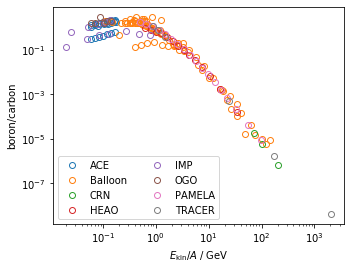

In [7]:
# let's plot the B/C ratios
import numpy as np
from matplotlib import pyplot as plt
import re
from collections import defaultdict

plt.figure()
plt.subplots_adjust(right=0.8)

# plot each experiment with different color, combine all sub-experiments
exps = defaultdict(lambda: False)
for this_sub_exp in tab["sub_exp"]:
    exp = re.match("([A-Za-z]+)", this_sub_exp).group(1)
    exps[exp] |= tab["sub_exp"] == this_sub_exp

for i, (exp, mask) in enumerate(exps.items()):
    ncycle = 8
    plt.plot(tab["e_mean"][mask], tab["value"][mask],
             "osD"[i // ncycle], 
             color="None", mec="C%i" % (i % ncycle),
             label=exp)

plt.legend(ncol=2)
plt.xlabel("$E_\\mathrm{kin} / A$ / GeV")
plt.ylabel("boron/carbon")
plt.loglog();

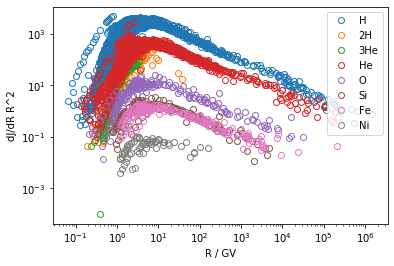

In [8]:
# plot fluxes of several isotopes/elements vs rigidity scaled with R^2
for ielem, elem in enumerate(("H", "2H", "3He", "He", "O", "Si", "Fe", "Ni")):
    tab = crdb.query(elem, energy_type="R", flux_rescaling=2)
    plt.plot(tab["e_mean"], tab["value"], "o", color="None", mec=f"C{ielem}", label=elem)
plt.xlabel("R / GV")
plt.ylabel("dJ/dR R^2")
plt.legend()
plt.loglog();